In [15]:
import pandas as pd


In [16]:
table=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'],sep = ', ')
table.head()

C:\Users\gerko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
#1. How many males and females are there?

In [18]:
table.groupby('sex').sex.count()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

In [19]:
#2. What is the mean male age?

In [20]:
table[table.sex == 'Male'].age.mean()

39.43354749885268

In [ ]:
#3. What is the propotion of the US cirizens?

In [23]:
len(table[table['native-country'] == 'United-States'])/len(table)*100

89.5857006848684

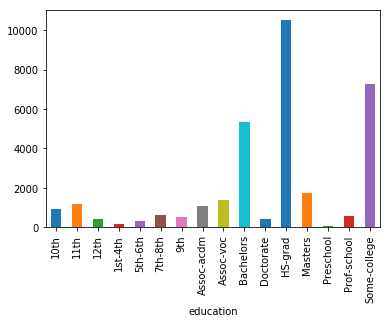

In [40]:
#4. Plot the distribution of people's education as a bar blot
table.groupby('education').age.count().plot.bar()

In [ ]:
#5 What is the mean and standard deviation of the "final weight" for divorced people?

In [48]:
table[table['martial-status'] == 'Divorced'].fnlwgt.mean()

185802.79045689848

In [49]:
table[table['martial-status'] == 'Divorced'].fnlwgt.std()

105646.78945933603

In [70]:
#6. Is it true that the people who recieved over 50k are mostly hight educated?
a = table[(table.salary == '>50K') & (table['education-num'] > 10)][['education-num', 'salary']].salary.count()
b = table[table.salary == '>50K'][['education-num', 'salary']].salary.count()
if a/b>0.5:
    print(True)
else:
    print(False)

True


In [ ]:
#7. What is the maximum male and female age for each race?

In [73]:
table.groupby('race').age.max()

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

In [77]:
#8. The people from which countries work as farmers/fishers
table[table.occupation == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

In [ ]:
#9. Consider the ratio of the number of 1) male bachelors to male masters , and 2) female bachelors to female masters . Which one is higher?

In [90]:
a=table[(table.education == 'Bachelors') & (table.sex == 'Male')].age.count()
b=table[(table.education == 'Masters') & (table.sex == 'Male')].age.count()
c=a/b
c

3.14743049705139

In [89]:
a=table[(table.education == 'Bachelors') & (table.sex == 'Female')].age.count()
b=table[(table.education == 'Masters') & (table.sex == 'Female')].age.count()
d=a/b
d

3.0205223880597014

In [91]:
max(c,d)

3.14743049705139

In [ ]:
#10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [93]:
table['hours-per-week'].max()

99

In [96]:
table[table['hours-per-week'] == table['hours-per-week'].max()].age.count()

85

In [97]:
table[table['hours-per-week'] == table['hours-per-week'].max()].salary

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: salary, Length: 85, dtype: object